# Лабораторная работа №2
## Обработка признаков (часть 1).

Рассмотрим исторические данные по выходу и продажам видеоигр из [на 2019 год](https://www.kaggle.com/ashaheedq/video-games-sales-2019)

## Задание:

[Оригинал](https://github.com/ugapanyuk/ml_course_2021/wiki/LAB_MMO__FEATURES):

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализацию числовых признаков.


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv('../videogames/vgsales-12-4-2019-short.csv')
print(f'Total loaded {len(df.index)} video games')

Total loaded 55792 video games


In [3]:
# Объединим продажи в одну колонку
df['Sales'] = df[['Total_Shipped', 'Global_Sales']].max(axis=1)
df['Sales'].fillna(0, inplace=True)

In [4]:
# Удалим лишнее
df = df.drop(columns = ['Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'])

## Добавим выброс

In [5]:
df.tail(1)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
55791,55792,Falcon Age,Action-Adventure,NaN,PS4,Unknown,Outerloop Games,NaN,NaN,NaN,0.0


In [6]:
fake_row = (66666, 'FakeGame', 'Music', 'E', 'NS', 'Drool', 'Drool', 29.0, 64.0, 2018.0, 0.0)
appendix = pd.DataFrame((fake_row,), columns=df.columns)
df = df.append(appendix, ignore_index=True)
df.tail(2)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
55791,55792,Falcon Age,Action-Adventure,NaN,PS4,Unknown,Outerloop Games,NaN,NaN,NaN,0.0
55792,66666,FakeGame,Music,E,NS,Drool,Drool,29.0,64.0,2018.0,0.0


## Устранение пропусков в данных

In [7]:
# Подсчитаем NaN-ы по каждой колонке
df.isna().sum()

Rank                0
Name                0
Genre               0
ESRB_Rating     32169
Platform            0
Publisher           0
Developer          17
Critic_Score    49256
User_Score      55457
Year              979
Sales               0
dtype: int64

In [8]:
# Удалим неизвестные игры
df.dropna(subset=['Developer', 'Year'], inplace=True)

In [9]:
# Слишком большой перевес NaN-ов относительно настоящих оценок. Лучше удалим
df.dropna(subset=['Critic_Score', 'User_Score'], inplace=True)

In [10]:
df['ESRB_Rating'].unique()

array(['E', 'M', 'T', 'E10', nan], dtype=object)

In [11]:
# «E» («Everyone») — «Для всех»
# Заменим пропуски на значение по умолчанию
df['ESRB_Rating'].fillna('E', inplace=True)

In [12]:
# Заменим оценки критиков и пользователей на средние значения
for col in ('Critic_Score', 'User_Score'):
    df[col].fillna(df[col].mean(), inplace=True)

In [13]:
# Подсчитаем NaN-ы по каждой колонке
df.isna().sum()

Rank            0
Name            0
Genre           0
ESRB_Rating     0
Platform        0
Publisher       0
Developer       0
Critic_Score    0
User_Score      0
Year            0
Sales           0
dtype: int64

## Кодирование категориальных признаков

In [14]:
# One-Hot
pd.get_dummies(df[['ESRB_Rating']])

,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T
2,1,0,0,0
4,1,0,0,0
6,1,0,0,0
8,1,0,0,0
11,1,0,0,0
...,...,...,...,...
48498,1,0,0,0
51097,0,1,0,0
54537,1,0,0,0
55423,0,1,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder

for col in ('Genre', 'Platform', 'Publisher', 'Developer'):
    le = LabelEncoder()
    col_le = le.fit_transform(df[col])
    print(np.unique(df[col]), np.unique(col_le))
    df[col] = col_le

df.head()

['Action' 'Action-Adventure' 'Adventure' 'Fighting' 'MMO' 'Misc' 'Music'
 'Platform' 'Puzzle' 'Racing' 'Role-Playing' 'Shooter' 'Simulation'
 'Sports' 'Strategy'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
['3DS' 'DS' 'GC' 'N64' 'NS' 'PC' 'PS' 'PS2' 'PS3' 'PS4' 'PSN' 'PSP' 'WW'
 'Wii' 'WiiU' 'X360' 'XB' 'XBL' 'XOne'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
['2K Games' 'Activision' 'Aksys Games' 'Atari' 'Atlus'
 'Bethesda Softworks' 'Blizzard Entertainment' 'Capcom' 'DotEmu' 'Drool'
 'EA Sports' 'Electronic Arts' 'FDG Entertainment' 'Feardemic'
 'Hudson Entertainment' 'Ignition Entertainment' 'Invisible Handlebar'
 'Konami' 'LucasArts' 'Mediatonic' 'Microprose' 'Microsoft Game Studios'
 'Midway Games' 'NIS America' 'Namco Bandai' 'Natsume' 'Nicalis'
 'Nintendo' 'Paradox Interactive' 'RedOctane' 'Rockstar Games' 'Sega'
 'Sony Computer Entertainment' 'Sony Interactive Entertainment' 'Square'
 'Square Enix' 'Strategy First' 'THQ' 'Team17 Software' 'Ubisoft'
 'Valve C

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
2,3,Mario Kart Wii,9,E,13,27,83,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,13,E,13,27,83,8.0,8.8,2009.0,33.09
6,7,New Super Mario Bros.,7,E,1,27,83,9.1,8.1,2006.0,30.80
8,9,New Super Mario Bros. Wii,7,E,13,27,83,8.6,9.2,2009.0,30.22
11,12,Wii Play,5,E,13,27,83,5.9,4.5,2007.0,28.02


In [16]:
# Static label encoding
di = {
    'RP':  0,
    'EC':  1,
    'KA':  2,
    'E':   3,
    'E10': 4,
    'T':   5,
    'M':   6,
    'AO':  7,
}

df.replace({'ESRB_Rating': di}, inplace=True)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales
2,3,Mario Kart Wii,9,3,13,27,83,8.2,9.1,2008.0,37.14
4,5,Wii Sports Resort,13,3,13,27,83,8.0,8.8,2009.0,33.09
6,7,New Super Mario Bros.,7,3,1,27,83,9.1,8.1,2006.0,30.80
8,9,New Super Mario Bros. Wii,7,3,13,27,83,8.6,9.2,2009.0,30.22
11,12,Wii Play,5,3,13,27,83,5.9,4.5,2007.0,28.02


## Нормализация числовых признаков

In [17]:
import scipy.stats as stats

In [18]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [19]:
def boxcox(data, col):
    diagnostic_plots(data, col)
    data[f'{col}_boxcox'], param = stats.boxcox(data[col]) 
    print('Оптимальное значение λ = {}'.format(param))
    diagnostic_plots(data, f'{col}_boxcox')

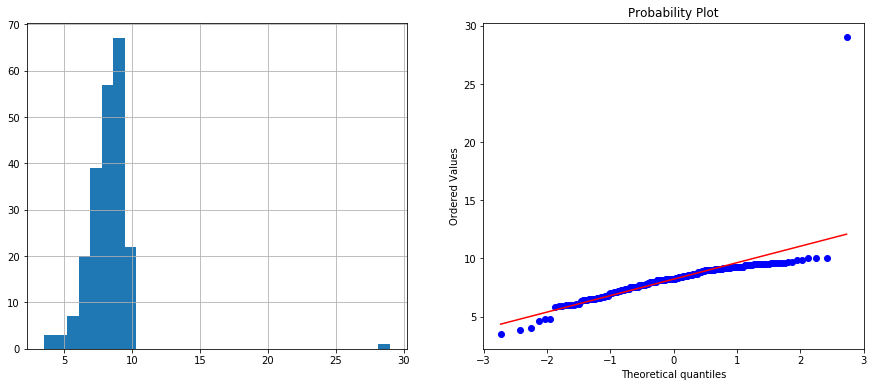

Оптимальное значение λ = -0.021821216576747314


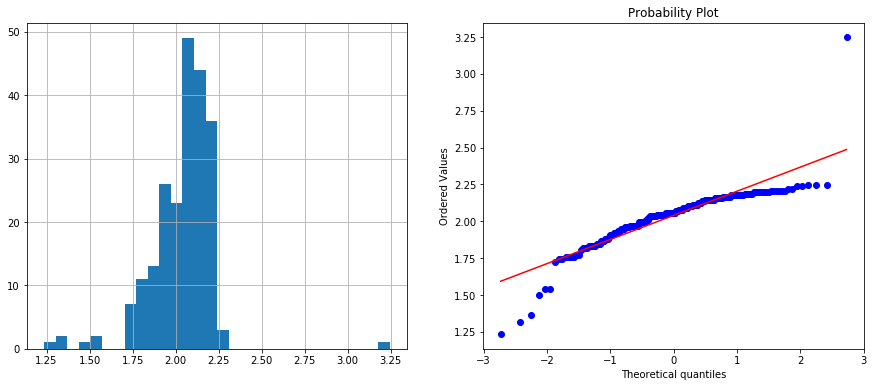

In [20]:
boxcox(df, 'Critic_Score')

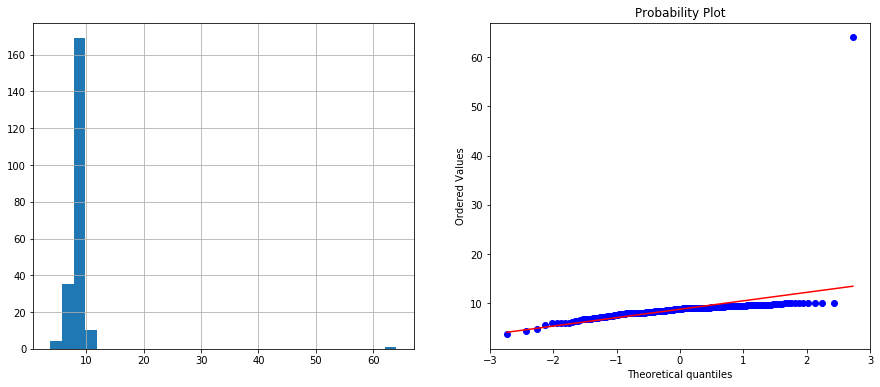

Оптимальное значение λ = -0.6048001579673186


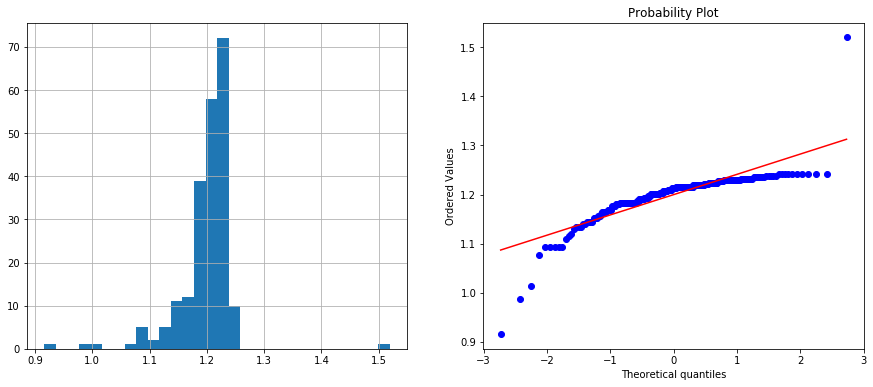

In [21]:
boxcox(df, 'User_Score')

In [22]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales,Critic_Score_boxcox,User_Score_boxcox
2,3,Mario Kart Wii,9,3,13,27,83,8.2,9.1,2008.0,37.14,2.056560,1.218568
4,5,Wii Sports Resort,13,3,13,27,83,8.0,8.8,2009.0,33.09,2.032969,1.209662
6,7,New Super Mario Bros.,7,3,1,27,83,9.1,8.1,2006.0,30.80,2.155914,1.186848
8,9,New Super Mario Bros. Wii,7,3,13,27,83,8.6,9.2,2009.0,30.22,2.102027,1.221433
11,12,Wii Play,5,3,13,27,83,5.9,4.5,2007.0,28.02,1.741018,0.987667


In [23]:
df.tail(1)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales,Critic_Score_boxcox,User_Score_boxcox
55792,66666,FakeGame,6,3,4,9,32,29.0,64.0,2018.0,0.0,3.246559,1.519776


## Сохраняем

In [24]:
save_path = '../videogames/video_games_s2.csv'
df.to_csv(save_path, index=False)

In [25]:
check_df = pd.read_csv(save_path)
check_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Sales,Critic_Score_boxcox,User_Score_boxcox
0,3,Mario Kart Wii,9,3,13,27,83,8.2,9.1,2008.0,37.14,2.056560,1.218568
1,5,Wii Sports Resort,13,3,13,27,83,8.0,8.8,2009.0,33.09,2.032969,1.209662
2,7,New Super Mario Bros.,7,3,1,27,83,9.1,8.1,2006.0,30.80,2.155914,1.186848
3,9,New Super Mario Bros. Wii,7,3,13,27,83,8.6,9.2,2009.0,30.22,2.102027,1.221433
4,12,Wii Play,5,3,13,27,83,5.9,4.5,2007.0,28.02,1.741018,0.987667
